<a href="https://colab.research.google.com/github/Arnobzzz/seizureSense/blob/main/1_%3Edefense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mne numpy pandas matplotlib scipy
# You might also consider !pip install pyprep if you want advanced automated bad channel detection.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 53.1 MB/s eta 0:00:00


In [ ]:
!pip install pyprep

In [ ]:
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

# Mute MNE info messages to keep output clean, useful in production scripts
mne.set_log_level('WARNING')


In [ ]:
import os
import zipfile
from google.colab import drive


In [ ]:
pip install mne numpy pandas matplotlib scipy


In [ ]:
import mne
import os

# Replace with the actual path to your EDF file on Google Drive
file_path = r"/content/fn1.edf"

raw = mne.io.read_raw_edf(file_path, preload=True, verbose='WARNING')
print("Original channel names:")
print(raw.ch_names)

/tmp/ipython-input-9-1680710272.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose='WARNING')
/tmp/ipython-input-9-1680710272.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose='WARNING')


Original channel names:
['EEG Fp1', 'EEG Fp2', 'EEG F7', 'EEG F3', 'EEG Fz', 'EEG F4', 'EEG F8', 'EEG T3', 'EEG C3', 'EEG Cz', 'EEG C4', 'EEG T4', 'EEG T5', 'EEG P3', 'EEG Pz', 'EEG P4', 'EEG T6', 'EEG O1', 'EEG O2', 'EEG A1', 'EEG A2', 'EKG', 'MK']


/tmp/ipython-input-9-1680710272.py:7: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose='WARNING')


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


In [ ]:
print(raw.annotations)


<Annotations | 12 segments: Closed Eyes (5), Open Eyes (4), Photic ...>


In [ ]:
import mne
file_path = r'/content/fn1.edf'  # Replace with an actual EDF filename
raw = mne.io.read_raw_edf(file_path, preload=True, verbose='WARNING')
print("Channel names:")
print(raw.ch_names)
print("\nSampling frequency:", raw.info['sfreq'])
print("\nAnnotations summary:", raw.annotations)


Channel names:
['EEG Fp1', 'EEG Fp2', 'EEG F7', 'EEG F3', 'EEG Fz', 'EEG F4', 'EEG F8', 'EEG T3', 'EEG C3', 'EEG Cz', 'EEG C4', 'EEG T4', 'EEG T5', 'EEG P3', 'EEG Pz', 'EEG P4', 'EEG T6', 'EEG O1', 'EEG O2', 'EEG A1', 'EEG A2', 'EKG', 'MK']

Sampling frequency: 128.0

Annotations summary: <Annotations | 12 segments: Closed Eyes (5), Open Eyes (4), Photic ...>


In [ ]:
raw.set_channel_types({'EKG': 'ecg', 'MK': 'misc'})  # or 'emg' if muscle


<RawEDF | fn1.edf, 23 x 154624 (1208.0 s), ~27.2 MiB, data loaded>

In [ ]:
raw.drop_channels(['EKG', 'MK'])


<RawEDF | fn1.edf, 21 x 154624 (1208.0 s), ~24.8 MiB, data loaded>

In [ ]:
montage = mne.channels.make_standard_montage('standard_1020')

# Rename channels to match montage (remove 'EEG ' prefix)
new_names = {ch: ch.replace('EEG ', '') for ch in raw.ch_names if ch.startswith('EEG ')}
raw.rename_channels(new_names)

raw.set_montage(montage)

<RawEDF | fn1.edf, 21 x 154624 (1208.0 s), ~24.8 MiB, data loaded>

Channels after cleaning and montage setting:
['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2', 'A1', 'A2']


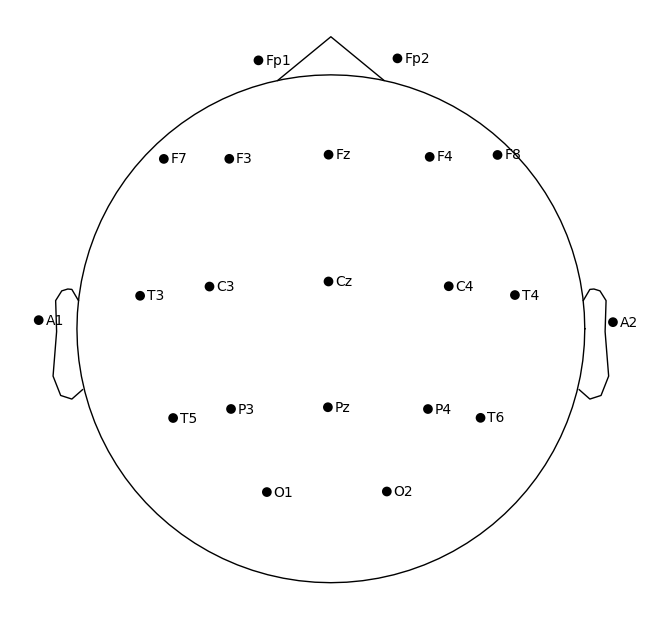

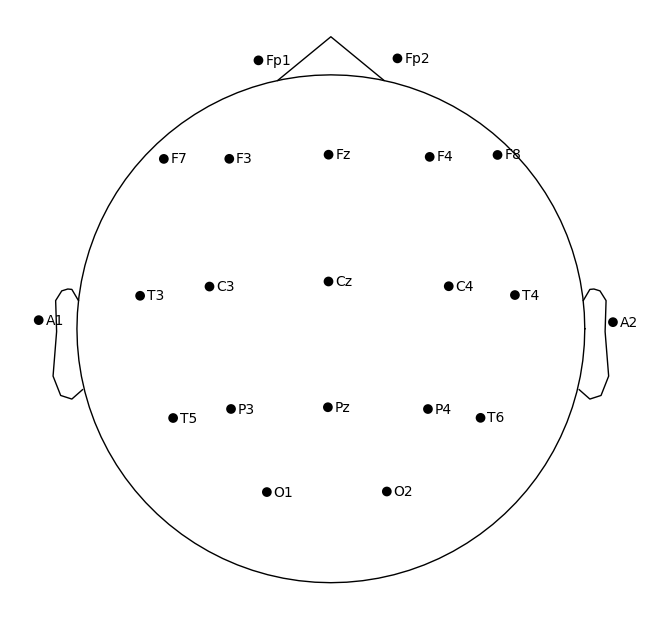

In [ ]:
import mne

file_path = r'/content/fn1.edf'  # Replace with your file

raw = mne.io.read_raw_edf(file_path, preload=True, verbose='WARNING')

# Remove 'EEG ' prefix
new_names = {ch: ch.replace('EEG ', '') for ch in raw.ch_names if ch.startswith('EEG ')}
raw.rename_channels(new_names)

# Set non-EEG channel types properly
raw.set_channel_types({'EKG': 'ecg', 'MK': 'misc'})

# Drop non-EEG channels if not needed for your analysis
raw.drop_channels(['EKG', 'MK'])

# Now set the standard 10-20 montage
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)

print("Channels after cleaning and montage setting:")
print(raw.ch_names)

# Optional: plot sensor locations to verify
raw.plot_sensors(kind='topomap', show_names=True)


In [ ]:
!pip install python-picard


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-picard: filename=python_picard-0.8-py3-none-any.whl size=16394 sha256=786bbe874221df23721cab4e7d5dab7b3afd4edb80e27792d9efb0c8f17e1bd2
  Stored in directory: /root/.cache/pip/wheels/86/7e/fc/6183c6bfdc791d9e7b5a1df84ec4f30055f76bc8414ab2300d
Successfully built python-picard


In [ ]:
ica = mne.preprocessing.ICA(n_components=0.99, random_state=97, method='picard')
ica.fit(raw, picks='eeg')


Method,picard
Fit parameters,max_iter=500
Fit,22 iterations on raw data (154624 samples)
ICA components,4
Available PCA components,21
Channel types,eeg
ICA components marked for exclusion,—


In [ ]:
import os
import mne

file_path = r'/content/fn1.edf'  # Replace with your actual file

# Load raw data
raw = mne.io.read_raw_edf(file_path, preload=True, verbose='WARNING')

# Clean channel names (already done, but repeat to be safe)
new_names = {ch: ch.replace('EEG ', '') for ch in raw.ch_names if ch.startswith('EEG ')}
raw.rename_channels(new_names)

# Set non-EEG channel types and drop non-EEG channels
raw.set_channel_types({'EKG': 'ecg', 'MK': 'misc'})
raw.drop_channels(['EKG', 'MK'])

# Set standard 10-20 montage
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)

# Apply bandpass filter 1-45 Hz (zero-phase FIR filter)
raw.filter(l_freq=1.0, h_freq=45.0, fir_design='firwin')

# Re-reference to common average
raw.set_eeg_reference(ref_channels='average')

# Run ICA to remove artifacts
ica = mne.preprocessing.ICA(n_components=0.99, random_state=97, method='picard')
ica.fit(raw, picks='eeg')

# Automatically find EOG and muscle-related artifact components
eog_indices, eog_scores = ica.find_bads_eog(raw, ch_name='Fp1', threshold=1.5)
muscle_indices, muscle_scores = ica.find_bads_muscle(raw, threshold=1.5)
ica.exclude = list(set(eog_indices + muscle_indices))

# Apply ICA cleaning
ica.apply(raw)

# Create fixed-length epochs (e.g., 2 seconds)
epoch_length = 2.0
events = mne.make_fixed_length_events(raw, id=1, duration=epoch_length, overlap=0.0)
epochs = mne.Epochs(raw, events, event_id=1, tmin=0, tmax=epoch_length - 1/raw.info['sfreq'], baseline=None, preload=True)

print(f"Created {len(epochs)} epochs")

# Save preprocessed epochs for later analysis
save_path = file_path.replace('.edf', '-epo.fif')
epochs.save(save_path, overwrite=True)
print(f"Saved preprocessed epochs to {save_path}")


Created 604 epochs
Saved preprocessed epochs to /content/fn1-epo.fif


In [ ]:
import mne

file_path = r'/content/fn1.edf'  # Your raw EDF file path

# Load raw EDF
raw = mne.io.read_raw_edf(file_path, preload=True, verbose='WARNING')

# Preprocessing steps (clean channel names, montage, filter, ICA) as before
new_names = {ch: ch.replace('EEG ', '') for ch in raw.ch_names if ch.startswith('EEG ')}
raw.rename_channels(new_names)
raw.set_channel_types({'EKG': 'ecg', 'MK': 'misc'})
raw.drop_channels(['EKG', 'MK'])
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)
raw.filter(l_freq=1.0, h_freq=45.0, fir_design='firwin')
raw.set_eeg_reference(ref_channels='average')

ica = mne.preprocessing.ICA(n_components=0.99, random_state=97, method='picard')
ica.fit(raw, picks='eeg')
eog_inds, _ = ica.find_bads_eog(raw, ch_name='Fp1', threshold=1.5)
muscle_inds, _ = ica.find_bads_muscle(raw, threshold=1.5)
ica.exclude = list(set(eog_inds + muscle_inds))
ica.apply(raw)

# Create fixed-length epochs (2 seconds)
epoch_length = 2.0
events = mne.make_fixed_length_events(raw, id=1, duration=epoch_length, overlap=0.0)
epochs = mne.Epochs(raw, events, event_id=1, tmin=0, tmax=epoch_length - 1/raw.info['sfreq'], baseline=None, preload=True)

# Save epochs to FIF file
epochs_file = file_path.replace('.edf', '-epo.fif')
epochs.save(epochs_file, overwrite=True)
print(f"Epochs saved to {epochs_file}")


Epochs saved to /content/fn1-epo.fif


In [ ]:
import numpy as np
import pandas as pd
import mne

# Load epochs FIF file (created above)
epochs_file = r'/content/fn1-epo.fif'  # Use the saved epochs FIF file path
epochs = mne.read_epochs(epochs_file, preload=True)

# Load original raw EDF to access annotations
raw_file = r'/content/fn1.edf'
raw = mne.io.read_raw_edf(raw_file, preload=True, verbose='WARNING')

# Extract annotations and label epochs (use code from previous step)
# ...


In [ ]:
import mne
import numpy as np
import pandas as pd
import os
from scipy.signal import welch
import collections

# Define the bandpower function (moved here for clarity)
def bandpower(data, sf, band, window_sec=None):
    low, high = band
    nperseg = int(window_sec * sf) if window_sec else min(256, len(data))
    if nperseg > len(data):
        nperseg = len(data)  # avoid warning by adjusting nperseg
    freqs, psd = welch(data, sf, nperseg=nperseg)
    idx_band = np.logical_and(freqs >= low, freqs <= high)
    return np.trapezoid(psd[idx_band], freqs[idx_band])

# === Part 1: Load, preprocess, epoch, and save ===

def preprocess_and_epoch(raw_edf_path, epoch_duration=2.0, overlap=0.0):
    print(f"Processing file: {raw_edf_path}")

    # Load raw EDF
    raw = mne.io.read_raw_edf(raw_edf_path, preload=True, verbose='WARNING')

    # Clean channel names
    new_names = {ch: ch.replace('EEG ', '') for ch in raw.ch_names if ch.startswith('EEG ')}
    raw.rename_channels(new_names)

    # Set non-EEG channel types and drop them
    raw.set_channel_types({'EKG': 'ecg', 'MK': 'misc'})
    raw.drop_channels(['EKG', 'MK'])

    # Set montage
    montage = mne.channels.make_standard_montage('standard_1020')
    raw.set_montage(montage)

    # Filter 1-45 Hz
    raw.filter(l_freq=1.0, h_freq=45.0, fir_design='firwin')

    # Re-reference
    raw.set_eeg_reference(ref_channels='average')

    # ICA for artifact removal
    ica = mne.preprocessing.ICA(n_components=0.99, random_state=97, method='picard')
    ica.fit(raw, picks='eeg')
    eog_inds, _ = ica.find_bads_eog(raw, ch_name='Fp1', threshold=1.5)
    muscle_inds, _ = ica.find_bads_muscle(raw, threshold=1.5)
    ica.exclude = list(set(eog_inds + muscle_inds))
    ica.apply(raw)

    # Create fixed-length epochs
    events = mne.make_fixed_length_events(raw, id=1, duration=epoch_duration, overlap=overlap)
    epochs = mne.Epochs(raw, events, event_id=1, tmin=0, tmax=epoch_duration - 1/raw.info['sfreq'], baseline=None, preload=True)

    print(f"Created {len(epochs)} epochs")

    # Save epochs
    epochs_file = raw_edf_path.replace('.edf', '-epo.fif')
    epochs.save(epochs_file, overwrite=True)
    print(f"Saved epochs to {epochs_file}")

    return epochs_file, raw_edf_path

# === Part 2: Load epochs, extract annotations, label epochs, and extract features ===

def label_and_extract_features(epochs_file, raw_edf_path, target_labels, bands, window_sec):
    print(f"\nLoading epochs from: {epochs_file}")
    epochs = mne.read_epochs(epochs_file, preload=True)

    print(f"Loading raw EDF from: {raw_edf_path}")
    raw = mne.io.read_raw_edf(raw_edf_path, preload=True, verbose='WARNING')

    # Clean channel names and montage again (for annotations)
    new_names = {ch: ch.replace('EEG ', '') for ch in raw.ch_names if ch.startswith('EEG ')}
    raw.rename_channels(new_names)
    raw.set_channel_types({'EKG': 'ecg', 'MK': 'misc'})
    raw.drop_channels(['EKG', 'MK'])
    montage = mne.channels.make_standard_montage('standard_1020')
    raw.set_montage(montage)

    # Extract annotations as DataFrame
    annots = raw.annotations
    annot_df = pd.DataFrame({
        'onset': annots.onset,
        'duration': annots.duration,
        'description': annots.description
    })

    print("Annotations summary:")
    print(annot_df['description'].value_counts())

    # Label epochs based on overlap with target annotation labels
    labels = []
    epoch_times = epochs.events[:, 0] / epochs.info['sfreq']
    epoch_dur = epochs.tmax - epochs.tmin

    for start in epoch_times:
        end = start + epoch_dur
        overlap = False
        for _, row in annot_df.iterrows():
            annot_start = row['onset']
            annot_end = annot_start + row['duration']
            if row['description'] in target_labels:
                if (start < annot_end) and (end > annot_start):
                    overlap = True
                    break
        labels.append(1 if overlap else 0)

    labels = np.array(labels)
    print(f"Number of epochs labeled as target: {labels.sum()}")
    print(f"Number of epochs labeled as non-target: {len(labels) - labels.sum()}")

    # Extract features (bandpower)
    sfreq = epochs.info['sfreq']
    features = []
    for epoch_data in epochs.get_data():
        epoch_features = []
        for band in bands.values():
            bp = np.mean([bandpower(ch_data, sfreq, band, window_sec) for ch_data in epoch_data])
            epoch_features.append(bp)
        features.append(epoch_features)

    features = np.array(features)
    print("Feature matrix shape:", features.shape)

    # Add labels to epochs metadata and save
    epochs.metadata = pd.DataFrame({'label': labels})
    labeled_epochs_file = epochs_file.replace('-epo.fif', '-epo-labeled.fif')
    epochs.save(labeled_epochs_file, overwrite=True)
    print(f"Saved labeled epochs to {labeled_epochs_file}")

    return features, labels, labeled_epochs_file

# === Example usage ===

# Replace with your actual EDF file path
edf_file_path = r'/content/fn1.edf'

# Step 1: Preprocess and epoch
epochs_file, raw_file = preprocess_and_epoch(edf_file_path, epoch_duration=2.0, overlap=0.0)

# Step 2: Define your target annotation labels (e.g., seizure labels)
target_annotation_labels = ['Seizure', 'Ictal']  # Update based on your annotation descriptions

# Step 3: Define bands for feature extraction
bands = {'delta': (0.5, 4), 'theta': (4, 8), 'alpha': (8, 13), 'beta': (13, 30)}
epoch_duration = 2.0 # Match epoching duration
window_sec = epoch_duration

# Step 4: Label epochs and extract features
features, labels, labeled_epochs_file = label_and_extract_features(epochs_file, raw_file, target_annotation_labels, bands, window_sec)

# Now you have 'features' (numpy array) and 'labels' (numpy array)
print("\nLabels array shape:", labels.shape)
print(f"Number of target samples: {np.sum(labels)}")
print(f"Number of non-target samples: {len(labels) - np.sum(labels)}")

Processing file: /content/fn1.edf
Created 604 epochs
Saved epochs to /content/fn1-epo.fif

Loading epochs from: /content/fn1-epo.fif
Loading raw EDF from: /content/fn1.edf
Annotations summary:
description
Closed Eyes                                                                         5
Open Eyes                                                                           4
System.Collections.Generic.List`1[System.Tuple`2[System.Single.System.DateTime]]    1
Photic Stimulation                                                                  1
Sleep                                                                               1
Name: count, dtype: int64
Number of epochs labeled as target: 0
Number of epochs labeled as non-target: 604
Feature matrix shape: (604, 4)
Saved labeled epochs to /content/fn1-epo-labeled.fif

Labels array shape: (604,)
Number of target samples: 0
Number of non-target samples: 604


In [ ]:
events, event_id = mne.events_from_annotations(raw)
print(event_id)


{np.str_('Closed Eyes'): 1, np.str_('Open Eyes'): 2, np.str_('Photic Stimulation'): 3, np.str_('Sleep'): 4, np.str_('System.Collections.Generic.List`1[System.Tuple`2[System.Single.System.DateTime]]'): 5}


In [ ]:
desired_epoch_length = 2.0 # Define the desired epoch length

epochs = mne.Epochs(raw, events, event_id=event_id, tmin=0, tmax=desired_epoch_length, baseline=None, preload=True)

In [ ]:
desired_epoch_length = 2.0

# Without baseline correction
epochs = mne.Epochs(raw, events, event_id=event_id, tmin=0, tmax=desired_epoch_length, baseline=None, preload=True)

# Or with baseline correction on first 200 ms
# epochs = mne.Epochs(raw, events, event_id=event_id, tmin=0, tmax=desired_epoch_length, baseline=(0, 0.2), preload=True)


In [ ]:
print(epochs)


<Epochs | 12 events (all good), 0 – 2 s (baseline off), ~577 KiB, data loaded,
 np.str_('Closed Eyes'): 5
 np.str_('Open Eyes'): 4
 np.str_('Photic Stimulation'): 1
 np.str_('Sleep'): 1
 np.str_('System.Collections.Generic.List`1[System.Tuple`2[System.Single.System.DateTime]]'): 1>


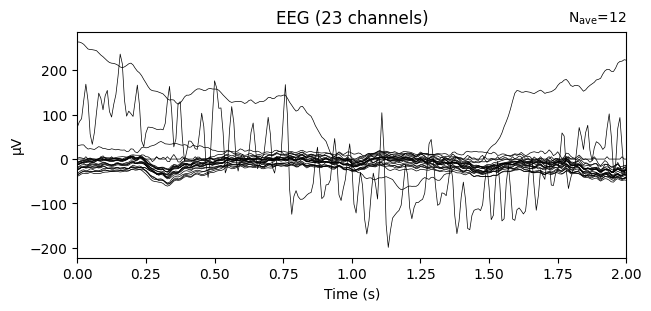

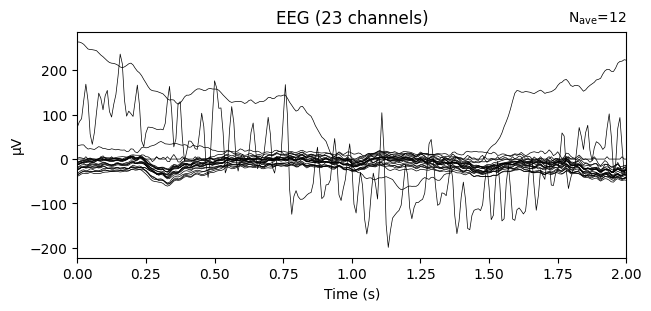

In [ ]:
epochs.average().plot()


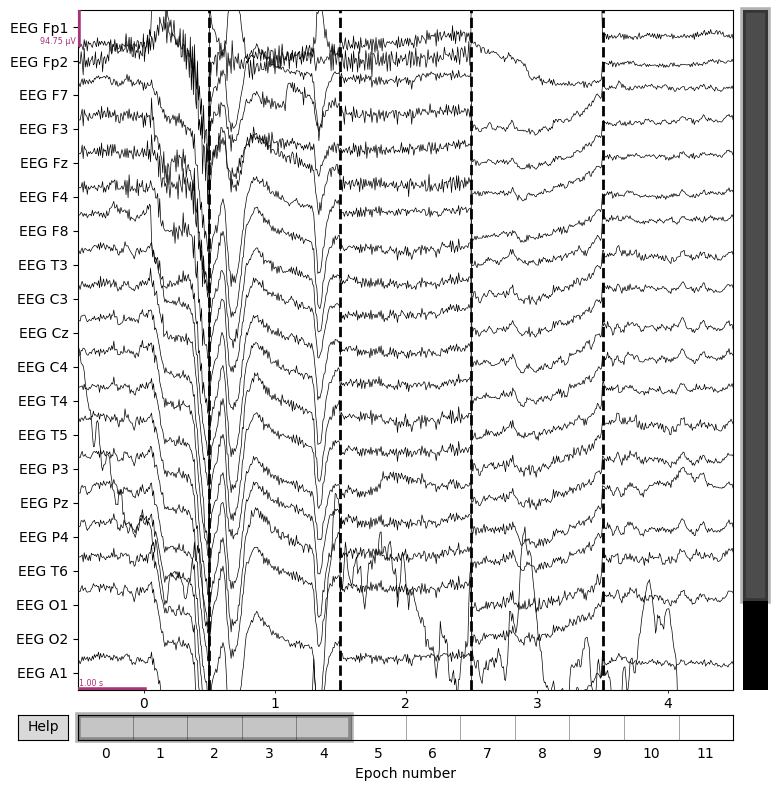

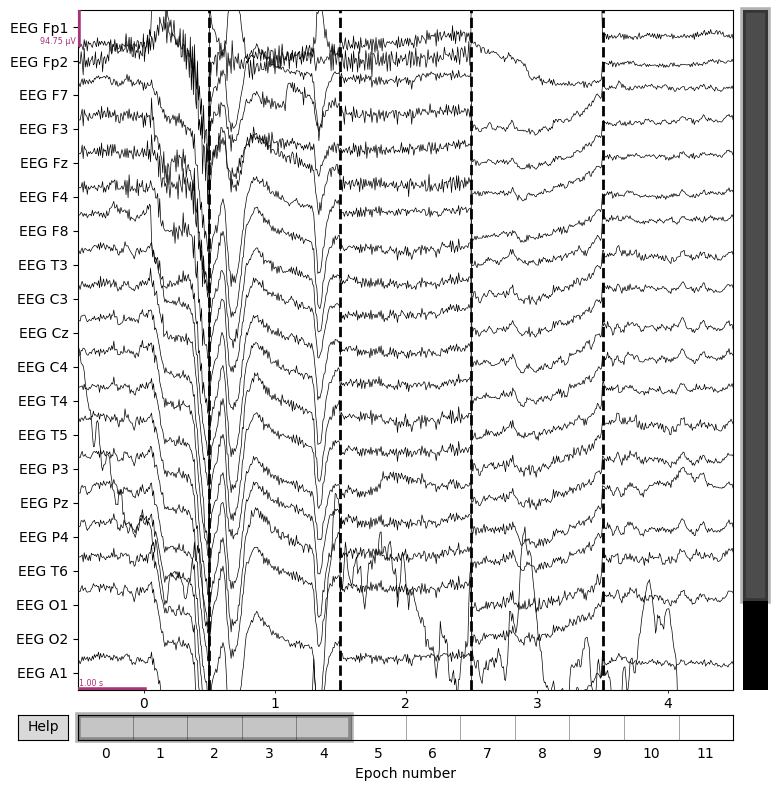

In [ ]:
epochs.plot(n_epochs=5, n_channels=20, scalings='auto')


In [ ]:
print(f"Number of epochs after rejection: {len(epochs)}")


Number of epochs after rejection: 12


In [ ]:
epochs = mne.Epochs(raw, events, event_id=event_id, tmin=0, tmax=2.0, baseline=(0, 0.2), preload=True)


In [ ]:
epochs = mne.Epochs(raw, events, event_id=event_id, tmin=0, tmax=2.0, baseline=None, preload=True, reject=None)


In [ ]:
import collections

event_counts = collections.Counter([raw.annotations.description[i] for i in range(len(raw.annotations))])
print("Annotation counts:")
print(event_counts)


Annotation counts:
Counter({np.str_('Closed Eyes'): 5, np.str_('Open Eyes'): 4, np.str_('System.Collections.Generic.List`1[System.Tuple`2[System.Single.System.DateTime]]'): 1, np.str_('Photic Stimulation'): 1, np.str_('Sleep'): 1})


In [ ]:
epoch_length = 2.0  # seconds
events = mne.make_fixed_length_events(raw, id=1, duration=epoch_length)
epochs = mne.Epochs(raw, events, tmin=0, tmax=epoch_length - 1/raw.info['sfreq'], baseline=None, preload=True)
print(f"Created {len(epochs)} fixed-length epochs")


Created 604 fixed-length epochs


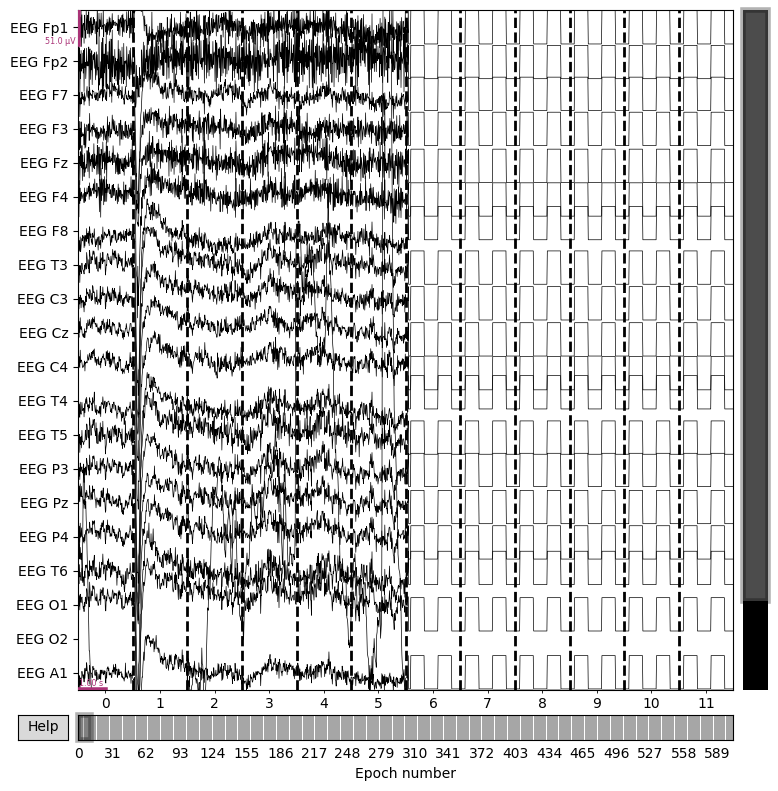

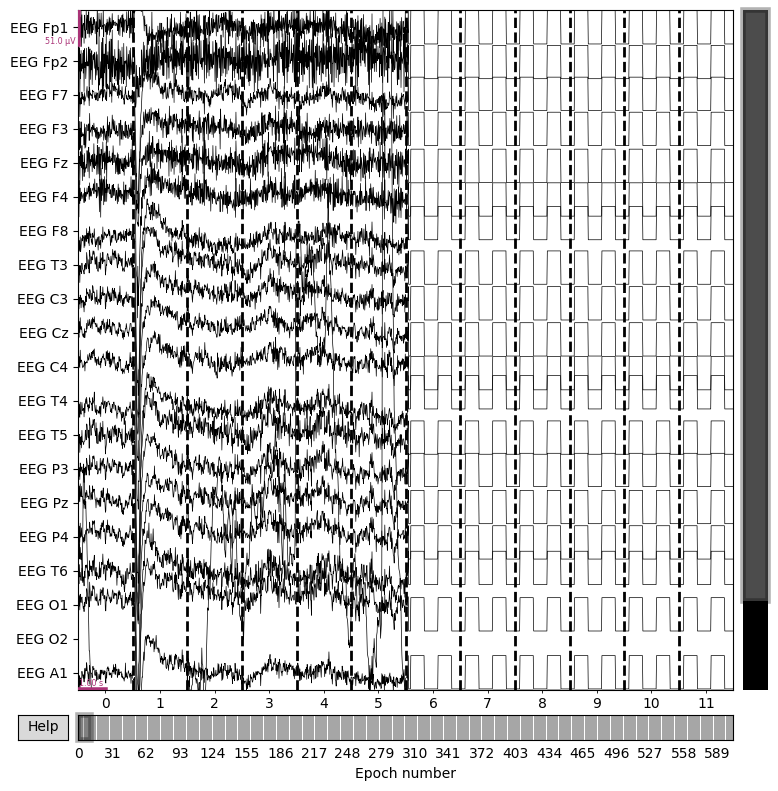

In [ ]:
epochs.plot(n_epochs=12, n_channels=20, scalings='auto')


In [ ]:
import numpy as np
import pandas as pd

# Convert annotations to DataFrame
annot_df = pd.DataFrame({
    'onset': raw.annotations.onset,
    'duration': raw.annotations.duration,
    'description': raw.annotations.description
})

def label_epochs(epochs, annot_df, target_labels):
    labels = []
    epoch_starts = epochs.events[:, 0] / epochs.info['sfreq']
    epoch_duration = epochs.tmax - epochs.tmin
    for start in epoch_starts:
        end = start + epoch_duration
        overlap = False
        for _, row in annot_df.iterrows():
            if row['description'] in target_labels:
                annot_start = row['onset']
                annot_end = annot_start + row['duration']
                if (start < annot_end) and (end > annot_start):
                    overlap = True
                    break
        labels.append(1 if overlap else 0)
    return np.array(labels)

# Example: label epochs with 'Closed Eyes' as target
target_labels = ['Closed Eyes']
epoch_labels = label_epochs(epochs, annot_df, target_labels)

print(f"Number of target epochs: {np.sum(epoch_labels)}")
print(f"Number of non-target epochs: {len(epoch_labels) - np.sum(epoch_labels)}")


Number of target epochs: 5
Number of non-target epochs: 599


In [ ]:
import numpy as np

def bandpower(data, sf, band, window_sec=None):
    from scipy.signal import welch
    low, high = band
    nperseg = window_sec * sf if window_sec else 4 * sf
    freqs, psd = welch(data, sf, nperseg=int(nperseg))
    idx_band = np.logical_and(freqs >= low, freqs <= high)
    return np.trapz(psd[idx_band], freqs[idx_band])

sfreq = epochs.info['sfreq']
bands = {'delta': (0.5, 4), 'theta': (4, 8), 'alpha': (8, 13), 'beta': (13, 30)}

features = []
for epoch in epochs.get_data():
    epoch_features = []
    for band in bands.values():
        # Average bandpower across all channels
        bp = np.mean([bandpower(ch_data, sfreq, band) for ch_data in epoch])
        epoch_features.append(bp)
    features.append(epoch_features)

features = np.array(features)
print("Feature matrix shape:", features.shape)


/usr/local/lib/python3.11/dist-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 512 is greater than input length  = 256, using nperseg = 256
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/tmp/ipython-input-44-1528948208.py:9: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(psd[idx_band], freqs[idx_band])


Feature matrix shape: (604, 4)


In [ ]:
import numpy as np
from scipy.signal import welch

def bandpower(data, sf, band, window_sec=None):
    low, high = band
    nperseg = int(window_sec * sf) if window_sec else min(256, len(data))
    if nperseg > len(data):
        nperseg = len(data)  # avoid warning by adjusting nperseg
    freqs, psd = welch(data, sf, nperseg=nperseg)
    idx_band = np.logical_and(freqs >= low, freqs <= high)
    return np.trapezoid(psd[idx_band], freqs[idx_band])


In [ ]:
sfreq = epochs.info['sfreq']
bands = {'delta': (0.5, 4), 'theta': (4, 8), 'alpha': (8, 13), 'beta': (13, 30)}
window_sec = epochs.tmax - epochs.tmin  # epoch length in seconds

# Feature extraction is now handled in the labeling function
# features = []
# for epoch in epochs.get_data():
#     epoch_features = []
#     for band in bands.values():
#         # Average bandpower across all channels
#         bp = np.mean([bandpower(ch_data, sfreq, band, window_sec) for ch_data in epoch])
#         epoch_features.append(bp)
#     features.append(epoch_features)

# features = np.array(features)
# print("Feature matrix shape:", features.shape)

In [ ]:
# This cell is now redundant and has been incorporated into cell 4l4ozDRSroAF

In [ ]:
import pandas as pd

df_features = pd.DataFrame(features, columns=bands.keys())
df_features['label'] = labels

# Save to CSV for easy loading later
df_features.to_csv('processed_eeg_features.csv', index=False)
print("Saved features and labels to 'processed_eeg_features.csv'")


Saved features and labels to 'processed_eeg_features.csv'


In [ ]:
import mne

def load_and_preprocess(raw_file_path):
    # Load raw EDF file
    raw = mne.io.read_raw_edf(raw_file_path, preload=True, verbose='WARNING')

    # Clean channel names (remove 'EEG ' prefix if present)
    new_names = {ch: ch.replace('EEG ', '') for ch in raw.ch_names if ch.startswith('EEG ')}
    raw.rename_channels(new_names)

    # Set channel types for non-EEG channels and drop them
    raw.set_channel_types({'EKG': 'ecg', 'MK': 'misc'})
    raw.drop_channels(['EKG', 'MK'])

    # Set standard 10-20 montage
    montage = mne.channels.make_standard_montage('standard_1020')
    raw.set_montage(montage)

    # Bandpass filter (1-45 Hz)
    raw.filter(l_freq=1.0, h_freq=45.0, fir_design='firwin')

    # Re-reference to average
    raw.set_eeg_reference(ref_channels='average')

    # Run ICA to remove artifacts
    ica = mne.preprocessing.ICA(n_components=0.99, random_state=97, method='picard')
    ica.fit(raw, picks='eeg')

    # Find artifact components (EOG and muscle)
    eog_inds, _ = ica.find_bads_eog(raw, ch_name='Fp1', threshold=1.5)
    muscle_inds, _ = ica.find_bads_muscle(raw, threshold=1.5)
    ica.exclude = list(set(eog_inds + muscle_inds))

    # Apply ICA cleaning
    ica.apply(raw)

    return raw


In [ ]:
raw_file = '/content/fn1.edf'  # Replace with your EDF file path

# 1. Load and preprocess EEG data
raw = load_and_preprocess(raw_file)

# 2. Create fixed-length epochs (e.g., 2 seconds, 50% overlap)
epoch_length = 2.0
overlap = 1.0  # seconds
events = mne.make_fixed_length_events(raw, id=1, duration=epoch_length, overlap=overlap)
epochs = mne.Epochs(raw, events, event_id=1, tmin=0, tmax=epoch_length - 1/raw.info['sfreq'], baseline=None, preload=True)

print(f"Created {len(epochs)} epochs")

# 3. Proceed with feature extraction, labeling, and classification


Created 1207 epochs


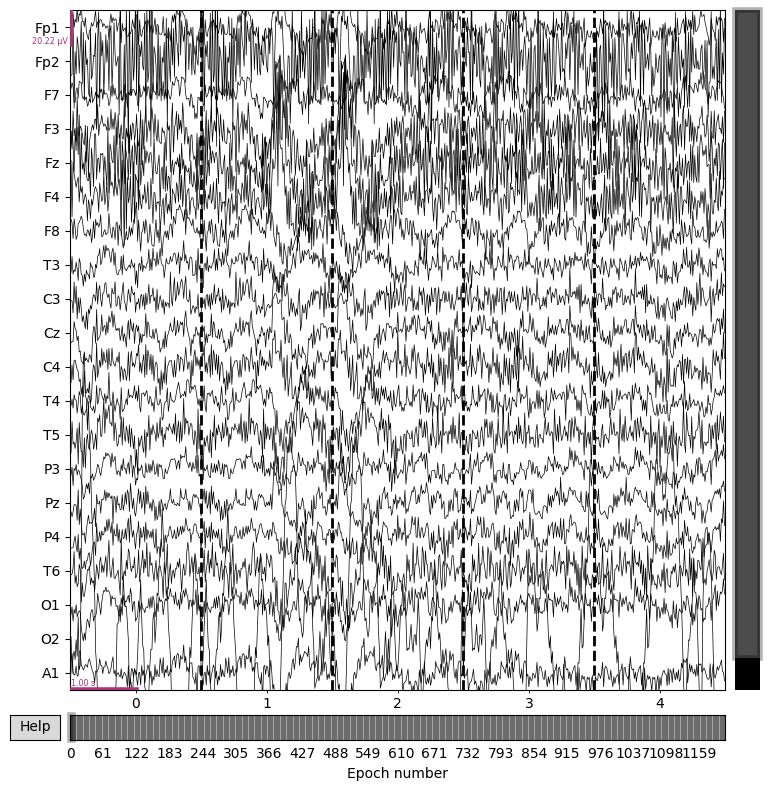

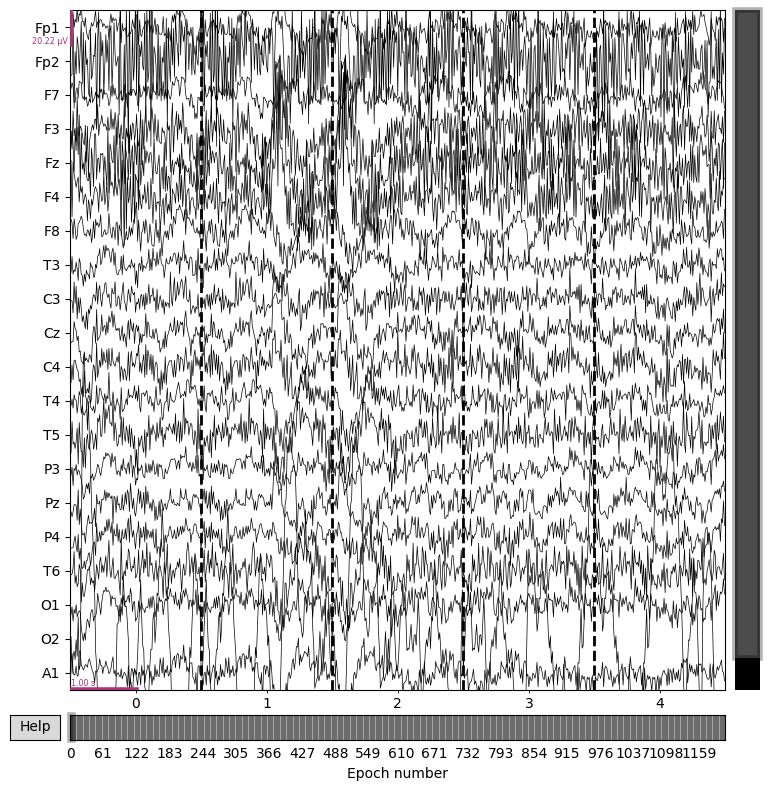

In [ ]:
# Plot a few epochs
epochs.plot(n_epochs=5, n_channels=20, scalings='auto')

In [ ]:
import zipfile
import os

# Step 1: Upload ZIP file (Google Colab)
from google.colab import files

print("Please upload your dataset ZIP file (e.g., adora_real.zip):")
uploaded = files.upload()  # This will open a file selector dialog

# Step 2: Get the uploaded ZIP filename
zip_filename = list(uploaded.keys())[0]
print(f"Uploaded file: {zip_filename}")

# Step 3: Define extraction folder (create if not exists)
extract_path = './adora_real_dataset/'
os.makedirs(extract_path, exist_ok=True)

# Step 4: Extract ZIP contents
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Extracted ZIP contents to: {extract_path}")

# Step 5: List files and folders in extraction directory to verify
print("Top-level files and folders in extracted directory:")
print(os.listdir(extract_path))


Please upload your dataset ZIP file (e.g., adora_real.zip):


Saving adora real.zip to adora real (1).zip
Uploaded file: adora real (1).zip
Extracted ZIP contents to: ./adora_real_dataset/
Top-level files and folders in extracted directory:
['adora real']


In [ ]:
import mne
from tqdm import tqdm  # Progress bar

# Step 6: Recursively find all EDF files inside the extracted folder
edf_files = []
for root, dirs, files in os.walk(extract_path):
    for file in files:
        if file.lower().endswith('.edf'):
            edf_files.append(os.path.join(root, file))

print(f"Total EDF files found: {len(edf_files)}")

# Step 7: Define preprocessing function
def load_and_preprocess(raw_file_path):
    raw = mne.io.read_raw_edf(raw_file_path, preload=True, verbose='WARNING')
    new_names = {ch: ch.replace('EEG ', '') for ch in raw.ch_names if ch.startswith('EEG ')}
    raw.rename_channels(new_names)
    raw.set_channel_types({'EKG': 'ecg', 'MK': 'misc'})
    raw.drop_channels(['EKG', 'MK'])
    montage = mne.channels.make_standard_montage('standard_1020')
    raw.set_montage(montage)
    raw.filter(l_freq=1.0, h_freq=45.0, fir_design='firwin')
    raw.set_eeg_reference(ref_channels='average')
    ica = mne.preprocessing.ICA(n_components=0.99, random_state=97, method='picard')
    ica.fit(raw, picks='eeg')
    eog_inds, _ = ica.find_bads_eog(raw, ch_name='Fp1', threshold=1.5)
    muscle_inds, _ = ica.find_bads_muscle(raw, threshold=1.5)
    ica.exclude = list(set(eog_inds + muscle_inds))
    ica.apply(raw)
    return raw

# Step 8: Define epoching function
def create_epochs(raw, epoch_length=2.0, overlap=1.0):
    events = mne.make_fixed_length_events(raw, id=1, duration=epoch_length, overlap=overlap)
    epochs = mne.Epochs(raw, events, event_id=1, tmin=0,
                        tmax=epoch_length - 1/raw.info['sfreq'], baseline=None, preload=True)
    return epochs

# Step 9: Create output folder for epochs
output_folder = os.path.join(extract_path, 'processed_epochs')
os.makedirs(output_folder, exist_ok=True)

# Step 10: Batch process all EDF files with progress bar
for edf_path in tqdm(edf_files, desc="Processing EDF files"):
    try:
        raw = load_and_preprocess(edf_path)
        epochs = create_epochs(raw, epoch_length=2.0, overlap=1.0)
        base_name = os.path.basename(edf_path).replace('.edf', '-epo.fif')
        save_path = os.path.join(output_folder, base_name)
        epochs.save(save_path, overwrite=True)
    except Exception as e:
        print(f"Failed to process {edf_path}: {e}")

print("Batch preprocessing and epoching completed.")


Total EDF files found: 212


Processing EDF files:  67%|██████▋   | 142/212 [51:19<18:54, 16.20s/it]

Failed to process ./adora_real_dataset/adora real/sust/mn31.edf: One PCA component captures most of the explained variance (99.85086654306106%), your threshold results in 1 component. You should select a higher value.


Processing EDF files:  98%|█████████▊| 207/212 [1:14:40<01:12, 14.43s/it]

Failed to process ./adora_real_dataset/adora real/sust/mn23.edf: One PCA component captures most of the explained variance (99.49267379127825%), your threshold results in 1 component. You should select a higher value.


Processing EDF files: 100%|██████████| 212/212 [1:15:46<00:00, 21.44s/it]

Batch preprocessing and epoching completed.


In [ ]:
import os
import pandas as pd
import mne
import numpy as np
from tqdm import tqdm

# Path to your epoch files
epochs_folder = os.path.join(extract_path, 'processed_epochs')

epoch_files = [os.path.join(epochs_folder, f) for f in os.listdir(epochs_folder) if f.endswith('-epo.fif')]

bands = {'delta': (0.5, 4), 'theta': (4, 8), 'alpha': (8, 13), 'beta': (13, 30)}

def bandpower(data, sf, band):
    from scipy.signal import welch
    low, high = band
    freqs, psd = welch(data, sf, nperseg=256)
    idx_band = np.logical_and(freqs >= low, freqs <= high)
    return np.trapz(psd[idx_band], freqs[idx_band])

def get_label_from_filename(filename):
    # Extract prefix from filename (e.g., 'mn41-epo.fif' -> 'mn')
    prefix = os.path.basename(filename)[:2].lower()
    if prefix in ['mn', 'fn']:
        return 0  # Negative (no epilepsy)
    elif prefix in ['mp', 'fp']:
        return 1  # Positive (epileptic)
    else:
        raise ValueError(f"Unknown prefix in filename: {filename}")

def get_gender_from_filename(filename):
    prefix = os.path.basename(filename)[:2].lower()
    if prefix in ['mn', 'mp']:
        return 'male'
    elif prefix in ['fn', 'fp']:
        return 'female'
    else:
        return 'unknown'

features_list = []
labels_list = []
gender_list = []
file_list = []

for epo_file in tqdm(epoch_files, desc="Extracting features and labels"):
    epochs = mne.read_epochs(epo_file, preload=True)
    sfreq = epochs.info['sfreq']
    label = get_label_from_filename(epo_file)
    gender = get_gender_from_filename(epo_file)

    for epoch_data in epochs.get_data():
        feature_vector = []
        for band in bands.values():
            bp = np.mean([bandpower(ch, sfreq, band) for ch in epoch_data])
            feature_vector.append(bp)
        features_list.append(feature_vector)
        labels_list.append(label)
        gender_list.append(gender)
        file_list.append(os.path.basename(epo_file))

# Create DataFrame
df_features = pd.DataFrame(features_list, columns=bands.keys())
df_features['label'] = labels_list
df_features['gender'] = gender_list
df_features['file'] = file_list

print(df_features.head())


Extracting features and labels:   0%|          | 0/210 [00:00<?, ?it/s]/tmp/ipython-input-62-1212297082.py:19: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(psd[idx_band], freqs[idx_band])
Extracting features and labels:   0%|          | 1/210 [00:36<2:06:47, 36.40s/it]/tmp/ipython-input-62-1212297082.py:19: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(psd[idx_band], freqs[idx_band])
Extracting features and labels:   1%|          | 2/210 [00:57<1:35:20, 27.50s/it]/tmp/ipython-input-62-1212297082.py:19: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(psd[idx_band], freqs[idx_band])
Extracting features and labels:   1%|▏         | 3/210 [01:18<1:23:39, 24.25s/it]/tmp/ipy

          delta         theta         alpha          beta  label  gender  \
0  6.106468e-12  1.032802e-12  4.416485e-13  1.282701e-12      0  female   
1  3.703066e-12  1.919985e-12  1.354212e-12  2.821537e-12      0  female   
2  5.368933e-12  1.173970e-12  1.038099e-12  2.246782e-12      0  female   
3  6.063558e-12  1.312176e-12  1.587105e-12  2.287186e-12      0  female   
4  4.233612e-12  1.211072e-12  8.610492e-13  1.753092e-12      0  female   

          file  
0  fn7-epo.fif  
1  fn7-epo.fif  
2  fn7-epo.fif  
3  fn7-epo.fif  
4  fn7-epo.fif  


In [ ]:
def bandpower(data, sf, band):
    from scipy.signal import welch
    low, high = band
    freqs, psd = welch(data, sf, nperseg=256)
    idx_band = np.logical_and(freqs >= low, freqs <= high)
    return np.trapezoid(psd[idx_band], freqs[idx_band])  # updated here


In [ ]:
df_features.to_csv('features_with_labels.csv', index=False)


In [ ]:
import pandas as pd

df = pd.read_csv('features_with_labels.csv')
print(df.head())


          delta         theta         alpha          beta  label  gender  \
0  6.106468e-12  1.032802e-12  4.416485e-13  1.282701e-12      0  female   
1  3.703066e-12  1.919985e-12  1.354212e-12  2.821537e-12      0  female   
2  5.368933e-12  1.173970e-12  1.038099e-12  2.246782e-12      0  female   
3  6.063558e-12  1.312176e-12  1.587105e-12  2.287186e-12      0  female   
4  4.233612e-12  1.211072e-12  8.610492e-13  1.753092e-12      0  female   

          file  
0  fn7-epo.fif  
1  fn7-epo.fif  
2  fn7-epo.fif  
3  fn7-epo.fif  
4  fn7-epo.fif  


In [ ]:
# Make an explicit copy to avoid the warning
X = df[['delta', 'theta', 'alpha', 'beta']].copy()

# Now safely add the 'gender' column without warning
X['gender'] = df['gender'].map({'male': 0, 'female': 1})


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

           0       0.71      0.71      0.71     19023
           1       0.77      0.77      0.77     23569

    accuracy                           0.74     42592
   macro avg       0.74      0.74      0.74     42592
weighted avg       0.74      0.74      0.74     42592

ROC AUC Score: 0.8274789273392468


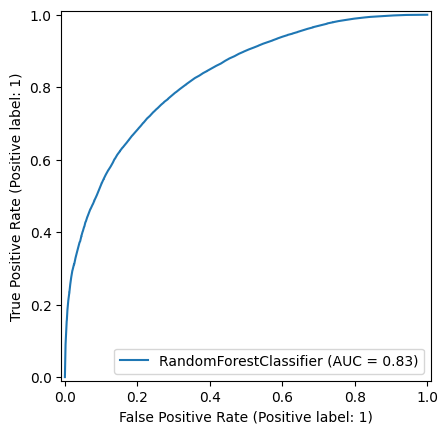

In [ ]:
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()


EEG Processing-->MNE-Python (EDF reading, filtering, ICA, epoching).
Data Handling-->os, zipfile, pandas.
Feature Extraction-->Welch’s method (scipy.signal), band power.
Labeling	Filename-->based binary labels (seizure/non-seizure).
Machine Learnin-->scikit-learn Random Forest, train/test split, metrics.
Visualization-->matplotlib, scikit-learn plotting functions.
Utilities-->tqdm (progress bars).